In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(0)
X_train = np.random.rand(200, 2) * 2 - 1
y_train = np.logical_xor(X_train[:, 0] > 0, X_train[:, 1] > 0).astype(int)

X_test = np.random.rand(200, 2) * 2 - 1
y_test = np.logical_xor(X_test[:, 0] > 0, X_test[:, 1] > 0).astype(int)


In [4]:
model = Sequential([
    Dense(8, activation='relu', input_shape=(2,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
13/13 [==============================] - 1s 20ms/step - loss: 0.6695 - accuracy: 0.5450 - val_loss: 0.6797 - val_accuracy: 0.4550
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6599 - accuracy: 0.5650 - val_loss: 0.6714 - val_accuracy: 0.5150
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6050 - val_loss: 0.6642 - val_accuracy: 0.5500
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6441 - accuracy: 0.6350 - val_loss: 0.6572 - val_accuracy: 0.6100
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6373 - accuracy: 0.6850 - val_loss: 0.6508 - val_accuracy: 0.6300
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6310 - accuracy: 0.6950 - val_loss: 0.6452 - val_accuracy: 0.6300
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6246 - accuracy: 0.7000 - val_loss: 0.6389 - val_accuracy: 0.6350
Epoch 8/100


313/313 [==============================] - 2s 4ms/step


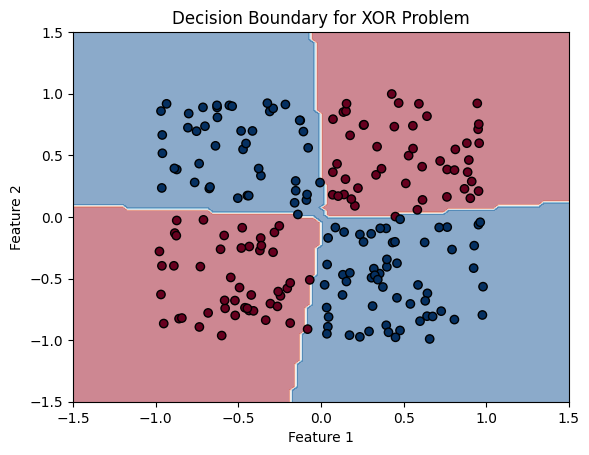

In [5]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

predictions = model.predict(grid_points)
predictions = (predictions > 0.5).astype(int)

predictions = predictions.reshape(xx.shape)

plt.contourf(xx, yy, predictions, alpha=0.5, cmap=plt.cm.RdBu)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k')

plt.title('Decision Boundary for XOR Problem')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1
from sklearn.metrics import accuracy_score

np.random.seed(0)
X_train = np.random.rand(200, 2) * 2 - 1
y_train = np.logical_xor(X_train[:, 0] > 0, X_train[:, 1] > 0).astype(int)

X_test = np.random.rand(200, 2) * 2 - 1
y_test = np.logical_xor(X_test[:, 0] > 0, X_test[:, 1] > 0).astype(int)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

best_penalty = None
best_val_accuracy = 0.0

penalty_coefficients = [0.001, 0.01, 0.1, 0.5, 1.0]

for penalty in penalty_coefficients:
    model_1 = Sequential([
        Dense(8, activation='relu', kernel_regularizer=l1(penalty), input_shape=(2,)),
        Dense(8, activation='relu', kernel_regularizer=l1(penalty)),
        Dense(1, activation='sigmoid')
    ])

    model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model_1.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_data=(X_val, y_val))

    _, val_accuracy = model_1.evaluate(X_val, y_val, verbose=0)

    print(f'Penalty: {penalty}, Validation Accuracy: {val_accuracy}')

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_penalty = penalty

final_model_1 = Sequential([
    Dense(8, activation='relu', kernel_regularizer=l1(best_penalty), input_shape=(2,)),
    Dense(8, activation='relu', kernel_regularizer=l1(best_penalty)),
    Dense(1, activation='sigmoid')
])

final_model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
final_model_1.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

test_loss, test_accuracy = final_model_1.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)



Penalty: 0.001, Validation Accuracy: 0.949999988079071
Penalty: 0.01, Validation Accuracy: 0.824999988079071
Penalty: 0.1, Validation Accuracy: 0.4000000059604645
Penalty: 0.5, Validation Accuracy: 0.4000000059604645
Penalty: 1.0, Validation Accuracy: 0.4000000059604645
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.7724 - accuracy: 0.4375
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7558 - accuracy: 0.3875
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7411 - accuracy: 0.3938
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7292 - accuracy: 0.4187
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7186 - accuracy: 0.4563
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7083 - accuracy: 0.4875
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.5188
Epoch 8/100
10/10 [=================

313/313 [==============================] - 0s 1ms/step


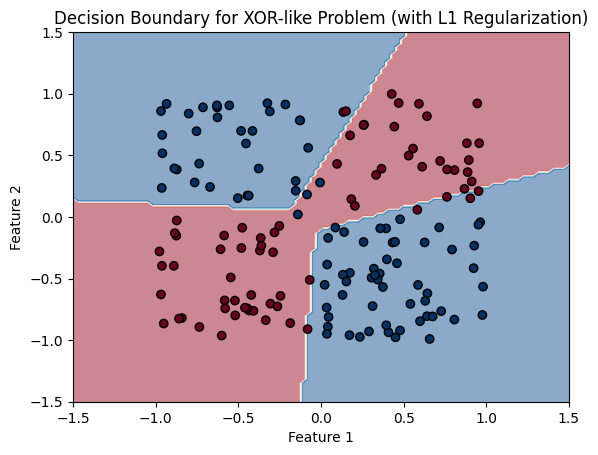

In [7]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

predictions = final_model_1.predict(grid_points)
predictions = (predictions > 0.5).astype(int)

predictions = predictions.reshape(xx.shape)

plt.contourf(xx, yy, predictions, alpha=0.5, cmap=plt.cm.RdBu)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k')

plt.title('Decision Boundary for XOR-like Problem (with L1 Regularization)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train = np.random.rand(200, 2) * 2 - 1
y_train = np.logical_xor(X_train[:, 0] > 0, X_train[:, 1] > 0).astype(int)

X_test = np.random.rand(200, 2) * 2 - 1
y_test = np.logical_xor(X_test[:, 0] > 0, X_test[:, 1] > 0).astype(int)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

best_penalty = None
best_val_accuracy = 0.0

penalty_coefficients = [0.001, 0.01, 0.1, 0.5, 1.0]

for penalty in penalty_coefficients:
    model_2 = Sequential([
        Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(penalty), input_shape=(2,)),
        Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(penalty)),
        Dense(1, activation='sigmoid')
    ])

    model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model_2.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_data=(X_val, y_val))

    _, val_accuracy = model_2.evaluate(X_val, y_val, verbose=0)

    print(f'Penalty: {penalty}, Validation Accuracy: {val_accuracy}')

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_penalty = penalty

model_2 = Sequential([
    Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(best_penalty), input_shape=(2,)),
    Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(best_penalty)),
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), epochs=100, batch_size=16, verbose=1)

test_loss, test_accuracy = model_2.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)






Penalty: 0.001, Validation Accuracy: 0.9750000238418579
Penalty: 0.01, Validation Accuracy: 0.675000011920929
Penalty: 0.1, Validation Accuracy: 0.4000000059604645
Penalty: 0.5, Validation Accuracy: 0.4000000059604645
Penalty: 1.0, Validation Accuracy: 0.4000000059604645
Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.7145 - accuracy: 0.4800
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5500
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.6350
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.7150
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.7600
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.7700
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.7900
Epoch 8/100
13/13 [================

313/313 [==============================] - 0s 1ms/step


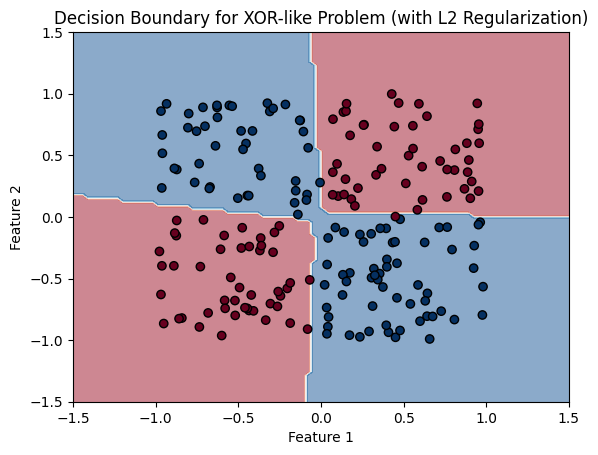

In [10]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

predictions = model_2.predict(grid_points)
predictions = (predictions > 0.5).astype(int)

predictions = predictions.reshape(xx.shape)

plt.contourf(xx, yy, predictions, alpha=0.5, cmap=plt.cm.RdBu)

plt.scatter(np.concatenate((X_train, X_val))[:, 0], np.concatenate((X_train, X_val))[:, 1],
            c=np.concatenate((y_train, y_val)), cmap=plt.cm.RdBu, edgecolors='k')

plt.title('Decision Boundary for XOR-like Problem (with L2 Regularization)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Logistic Regression (with additional features) - Train Accuracy: 0.95
Logistic Regression (with additional features) - Test Accuracy: 0.895


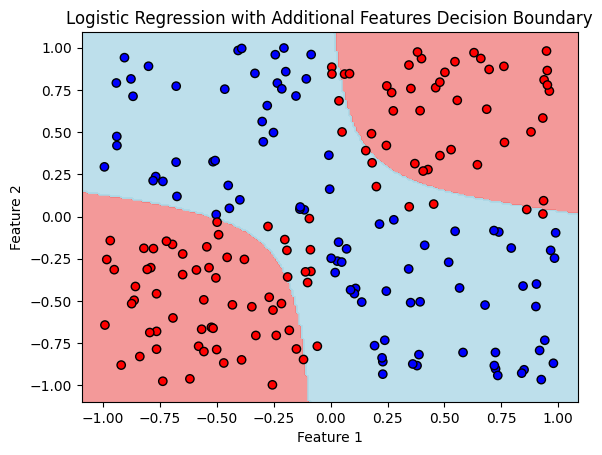

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

np.random.seed(0)
X_train = np.random.rand(200, 2) * 2 - 1
y_train = np.logical_xor(X_train[:, 0] > 0, X_train[:, 1] > 0).astype(int)

X_test = np.random.rand(200, 2) * 2 - 1
y_test = np.logical_xor(X_test[:, 0] > 0, X_test[:, 1] > 0).astype(int)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_poly, y_train)

train_accuracy = accuracy_score(y_train, log_reg.predict(X_train_poly))
test_accuracy = accuracy_score(y_test, log_reg.predict(X_test_poly))

print("Logistic Regression (with additional features) - Train Accuracy:", train_accuracy)
print("Logistic Regression (with additional features) - Test Accuracy:", test_accuracy)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=ListedColormap(['lightcoral', 'lightblue']), alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(log_reg, X_test, y_test, 'Logistic Regression with Additional Features Decision Boundary')

